In [1]:
import pandas as pd 
import numpy as np
data=pd.read_csv("/Users/jhasneha/Documents/fall2021/STAT 514 Project Data.csv")

In [2]:
data.head()

,Timestamp,Username,gender,degree,course_complete,international,job_search,same_undergrad,club,academic,...,avg_hrs_soc,effect_soc,grant_applied,grant_received,loan,sufficient_living_expense,work,avg_hrs_job,effect_job,grade
0,2021/11/29 2:45:26 PM EST,17fischerm@gmail.com,Female,Masters,NaN,Yes,Yes,No,Yes,Yes,...,NaN,Yes,Yes,Yes,Yes,No,No,NaN,NaN,Unsatisfied
1,2021/11/28 2:01:07 PM EST,aahmadza@purdue.edu,Male,Ph.D.,Yes,Yes,Yes,Yes,No,No,...,0.0,Yes,Yes,Yes,No,Yes,No,NaN,NaN,Just meets expectations
2,2021/11/24 6:58:17 PM EST,achary17@purdue.edu,Male,Masters,NaN,No,No,No,No,Yes,...,5.0,Yes,No,No,No,No,No,NaN,No,Above Expectations
3,2021/11/28 12:59:02 PM EST,aramaset@purdue.edu,Female,Masters,NaN,No,No,Yes,No,No,...,3.0,Yes,Yes,Yes,Yes,Yes,Yes,20.0,No,Just meets expectations
4,2021/11/25 12:59:21 PM EST,arclive202@gmail.com,Male,Masters,No,No,Yes,Yes,No,No,...,NaN,Yes,No,Yes,No,Yes,No,NaN,No,Just meets expectations


In [3]:
data["external_funding"]=data["grant_received"]+data["loan"]
dict_combo={'NoNo':'No','NoYes':'Yes','YesNo':'Yes','YesYes':'Yes'}
data["funding"]=data["external_funding"].map(dict_combo)

In [4]:
data=data.replace({"funding":{'No':0,'Yes':1}})
data["academic"]=data["academic"].fillna(0)
data["social_club"]=data["social_club"].fillna(0)
data=data.replace({"academic":{'No':0,'Yes':1}})
data=data.replace({"social_club":{'No':0,'Yes':1}})

In [5]:
table_1= pd.pivot_table(data, values="Username", index=["academic","social_club","funding"],columns=["gender","degree "], aggfunc=np.count_nonzero).fillna(0)
table_1

gender                        Female                        Male        \
degree                       Masters Ph.D. Undergraduate Masters Ph.D.   
academic social_club funding                                             
0        0           0           0.0   2.0           0.0     0.0   0.0   
                     1           0.0   2.0           0.0     2.0   5.0   
         1           0           1.0   0.0           0.0     0.0   2.0   
                     1           3.0   3.0           3.0     3.0   5.0   
1        0           1           1.0   0.0           0.0     0.0   0.0   
         1           0           0.0   0.0           0.0     1.0   0.0   
                     1           0.0   0.0           0.0     2.0   0.0   

gender                                      
degree                       Undergraduate  
academic social_club funding                
0        0           0                 0.0  
                     1                 0.0  
         1           0                 1.0  
                     1                 0.0  
1        0           1                 0.0  
         1           0                 0.0  
                     1                 0.0

In [6]:
table_1= pd.pivot_table(data, values="Username", index=["academic","social_club","funding"],columns=["grade"], aggfunc=np.count_nonzero).fillna(0)
table_1["Just meets expectations"]=table_1["Just meets expectations"]+table_1["Unsatisfied"]
table_1=table_1.drop(columns="Unsatisfied")
table_1

grade                         Above Expectations  Just meets expectations
academic social_club funding                                             
0        0           0                       2.0                      0.0
                     1                       1.0                      8.0
         1           0                       2.0                      2.0
                     1                       8.0                      9.0
1        0           1                       0.0                      1.0
         1           0                       1.0                      0.0
                     1                       2.0                      0.0

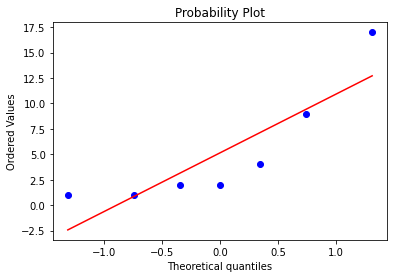

In [7]:
import numpy as np 
import pylab 
import scipy.stats as stats
measurement=table_1["Above Expectations"]+table_1["Just meets expectations"]
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
#stats.probplot(table_1["Above Expectations"], dist="norm", plot=pylab)
stats.probplot(measurement, dist="norm", plot=pylab)

pylab.show()

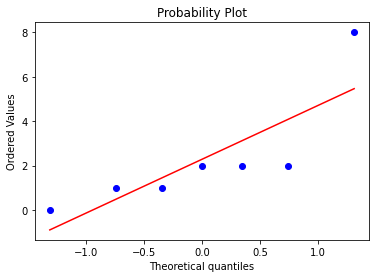

In [8]:
import numpy as np 
import pylab 
import scipy.stats as stats
measurement=table_1["Above Expectations"]+table_1["Just meets expectations"]
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(table_1["Above Expectations"], dist="norm", plot=pylab)
#stats.probplot(measurement, dist="norm", plot=pylab)

pylab.show()